In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("C:\\adanced python\\student database.csv")

In [25]:
print(df)
print("sample row")
print(df.head())
print("Dataset shape")
print(f'Rows:{df.shape[0]},columns:{df.shape[1]}')

print("dataset info")
print(df.info())

print("summary statistices")
print(df.describe(include='all'))

print("missing value")
print(df.isnull().sum())



    studyhours  attendence  pastscore  internet  sleephours  passed
0            0          60         40         1           5       0
1            5          80         60         0           6       1
2            8          90         75         1           8       1
3            3          70         50         1           5       0
4            7          85         70         0           7       1
5            1          50         30         0           4       0
6            6          78         68         1           6       1
7            4          65         55         0           5       0
8            9          95         80         1           9       1
9            2          55         35         0           4       0
10           5          76         65         1           6       1
11           6          88         72         1           7       1
12           1          40         25         0           3       0
13           3          60         45         0 

In [29]:
print(df.isnull().sum())

StudyHours    0
Attendence    0
Pastscore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64


In [31]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:\\adanced python\\student database.csv")
print("missing values  in each column")
print(df.isnull().sum())

le = LabelEncoder()
df['internet'] = le.fit_transform(df["Internet"])
df['passed'] = le.fit_transform(df["passed"])



missing values  in each column
StudyHours    0
Attendence    0
Pastscore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64


KeyError: 'passed'

In [18]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:\\adanced python\\student database.csv")

# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

print("Columns in dataset:", df.columns.tolist())

print("\nMissing values in each column:")
print(df.isnull().sum())

le = LabelEncoder()
df['internet'] = le.fit_transform(df['internet'])
df['passed'] = le.fit_transform(df['passed'])

print("\nAfter encoding:")
print(df.head())

print("\nData types after cleaning:")
print(df.dtypes)
df.describe


Columns in dataset: ['studyhours', 'attendence', 'pastscore', 'internet', 'sleephours', 'passed']

Missing values in each column:
studyhours    0
attendence    0
pastscore     0
internet      0
sleephours    0
passed        0
dtype: int64

After encoding:
   studyhours  attendence  pastscore  internet  sleephours  passed
0           0          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1

Data types after cleaning:
studyhours    int64
attendence    int64
pastscore     int64
internet      int32
sleephours    int64
passed        int32
dtype: object


<bound method NDFrame.describe of     studyhours  attendence  pastscore  internet  sleephours  passed
0            0          60         40         1           5       0
1            5          80         60         0           6       1
2            8          90         75         1           8       1
3            3          70         50         1           5       0
4            7          85         70         0           7       1
5            1          50         30         0           4       0
6            6          78         68         1           6       1
7            4          65         55         0           5       0
8            9          95         80         1           9       1
9            2          55         35         0           4       0
10           5          76         65         1           6       1
11           6          88         72         1           7       1
12           1          40         25         0           3       0
13           3

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from  sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import  matplotlib.pyplot as plt 
import seaborn as sns

Columns in dataset: ['studyhours', 'attendence', 'pastscore', 'internet', 'sleephours', 'passed']

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



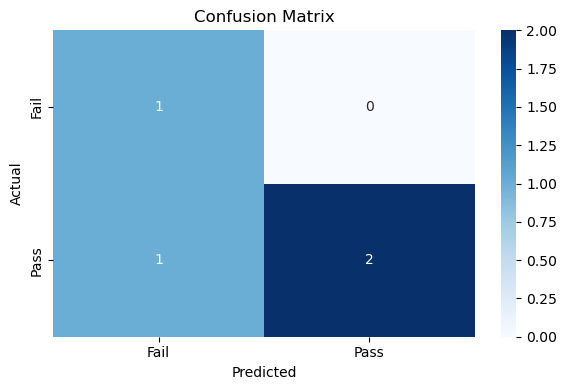


----- Predict Your Result -----


Enter studyhours:  10
Enter attendence:  95
Enter pastscore:  35
Enter internet:  1
Enter sleephours:  9



Prediction based on input: Pass


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [87]:
##### import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\adanced python\\student database.csv")

# Lowercase column names for consistency
df.columns = df.columns.str.lower()
print("Columns in dataset:", df.columns.tolist())

# Step 1: Automatically detect target column (pass/fail)
possible_targets = ['passed', 'pass', 'result', 'status', 'outcome']
target_column = None
for col in possible_targets:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    raise ValueError("Could not find target column (pass/fail). Please check your CSV.")

df.rename(columns={target_column: 'passed'}, inplace=True)

# Step 2: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 3: Select numeric features (exclude target)
features = df.select_dtypes(include='number').columns.tolist()
features = [f for f in features if f != 'passed']

# Step 4: Scale numeric features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 5: Split data
x = df[features]
y = df['passed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 8: Predict user input
print("\n----- Predict Your Result -----")
try:
    user_input = {}
    for f in features:
        val = float(input(f"Enter {f}: "))
        user_input[f] = val

    user_input_df = pd.DataFrame([user_input])
    user_input_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)[0]
    result = "Pass" if prediction == 1 else "Fail"
    print(f"\nPrediction based on input: {result}")

except Exception as e:
    print("Error occurred:", e)

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv("C:\\adanced python\\student database.csv")

In [69]:
df

,StudyHours,Attendence,Pastscore,Internet,SleepHours,Passed
0,0,60,40,yes,5,no
1,5,80,60,no,6,yes
2,8,90,75,yes,8,yes
3,3,70,50,yes,5,no
4,7,85,70,no,7,yes
5,1,50,30,no,4,no
6,6,78,68,yes,6,yes
7,4,65,55,no,5,no
8,9,95,80,yes,9,yes
9,2,55,35,no,4,no


In [70]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Internet"] = label.fit_transform(df["Internet"])
df["Passed"] = label.fit_transform(df["Passed"])
df

,StudyHours,Attendence,Pastscore,Internet,SleepHours,Passed
0,0,60,40,1,5,0
1,5,80,60,0,6,1
2,8,90,75,1,8,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1
5,1,50,30,0,4,0
6,6,78,68,1,6,1
7,4,65,55,0,5,0
8,9,95,80,1,9,1
9,2,55,35,0,4,0


In [71]:
df.columns

Index(['StudyHours', 'Attendence', 'Pastscore', 'Internet', 'SleepHours',
       'Passed'],
      dtype='object')

In [79]:
X = df[['StudyHours', 'Attendence', 'Pastscore', 'Internet', 'SleepHours']]
y = df["Passed"]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_, model.coef_)

-0.2371480049609208 [ 0.18478179  0.00960739 -0.00589147  0.29266459 -0.11512769]


In [81]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,model.predict(X_test)))

0.09876005784991201


In [82]:
def pred(x):
    if x >= 1:
        print("Pass")
    else:
        print("Not passed")

In [83]:
pred(model.predict([[3,40,35,1,23]]))

Not passed


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
